In [30]:
!pip3 install pandas

import numpy as np
import pandas as pd

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, Lambda, Layer, Add, Multiply
from keras.models import Model, Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import argparse
import os

import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# Danmini_Doorbell

In [31]:
# Benign traffic
dataframe_dd_benign = pd.read_csv('nbaiot/Danmini_Doorbell/benign_traffic.csv', encoding = "utf-8", sep = ',' ) 
df_dd_benign = dataframe_dd_benign.copy(deep=True)

print("Size: ", df_dd_benign.shape); 
display(df_dd_benign.head(49548))

# Mirai
dataframe_dd_mirai_ack = pd.read_csv('nbaiot/Danmini_Doorbell/mirai/ack.csv', encoding = "utf-8", sep = ',' ) 
df_dd_mirai_ack = dataframe_dd_mirai_ack.copy(deep=True)

dataframe_dd_mirai_scan = pd.read_csv('nbaiot/Danmini_Doorbell/mirai/scan.csv', encoding = "utf-8", sep = ',' ) 
df_dd_mirai_scan = dataframe_dd_mirai_scan.copy(deep=True)

dataframe_dd_mirai_syn = pd.read_csv('nbaiot/Danmini_Doorbell/mirai/syn.csv', encoding = "utf-8", sep = ',' ) 
df_dd_mirai_syn = dataframe_dd_mirai_syn.copy(deep=True)

dataframe_dd_mirai_udp = pd.read_csv('nbaiot/Danmini_Doorbell/mirai/udp.csv', encoding = "utf-8", sep = ',' ) 
df_dd_mirai_udp = dataframe_dd_mirai_udp.copy(deep=True)

dataframe_dd_mirai_udpplain = pd.read_csv('nbaiot/Danmini_Doorbell/mirai/udpplain.csv', encoding = "utf-8", sep = ',' ) 
df_dd_mirai_udpplain = dataframe_dd_mirai_udpplain.copy(deep=True)

# Gafgyt
dataframe_dd_gafgyt_combo = pd.read_csv('nbaiot/Danmini_Doorbell/gafgyt/combo.csv', encoding = "utf-8", sep = ',' ) 
df_dd_gafgyt_combo = dataframe_dd_gafgyt_combo.copy(deep=True)

dataframe_dd_gafgyt_junk = pd.read_csv('nbaiot/Danmini_Doorbell/gafgyt/junk.csv', encoding = "utf-8", sep = ',' ) 
df_dd_gafgyt_gafgyt = dataframe_dd_gafgyt_junk.copy(deep=True)

dataframe_dd_gafgyt_scan = pd.read_csv('nbaiot/Danmini_Doorbell/gafgyt/scan.csv', encoding = "utf-8", sep = ',' ) 
df_dd_gafgyt_scan = dataframe_dd_gafgyt_scan.copy(deep=True)

dataframe_dd_gafgyt_udp = pd.read_csv('nbaiot/Danmini_Doorbell/gafgyt/udp.csv', encoding = "utf-8", sep = ',' ) 
df_dd_gafgyt_udp = dataframe_dd_gafgyt_udp.copy(deep=True)

dataframe_dd_gafgyt_tcp = pd.read_csv('nbaiot/Danmini_Doorbell/gafgyt/tcp.csv', encoding = "utf-8", sep = ',' ) 
df_dd_gafgyt_tcp = dataframe_dd_gafgyt_udp.copy(deep=True)

Size:  (49548, 115)


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49543,1.000000,102.000000,0.000000e+00,1.000000,102.000000,1.820000e-12,1.000009,101.999633,0.015405,2.270210,...,3.640000e-12,-1.570000e-30,0.0,4.218824,102.000000,0.000000,144.249783,1.820000e-12,5.970000e-23,0.000000e+00
49544,1.999976,102.000000,0.000000e+00,1.999986,102.000000,1.820000e-12,2.000004,101.999816,0.007702,3.270209,...,3.640000e-12,-1.580000e-44,0.0,4.218838,102.000000,0.000000,144.249783,3.640000e-12,-1.100000e-29,0.000000e+00
49545,2.999872,102.000000,3.640000e-12,2.999923,102.000000,1.820000e-12,2.999983,101.999878,0.005135,4.270206,...,0.000000e+00,-8.330000e-45,0.0,4.179949,102.000000,0.000002,144.249783,5.140000e-12,8.230000e-29,2.260000e-17
49546,3.999664,102.000000,3.640000e-12,3.999798,102.000000,0.000000e+00,3.999942,101.999908,0.003851,5.270200,...,3.640000e-12,4.980000e-69,0.0,4.219537,102.000000,0.000001,144.249783,1.820000e-12,5.960000e-29,0.000000e+00


# Variational Autoencoder Model

In [32]:
scaler = MinMaxScaler()
df_dd_benign_norm = scaler.fit_transform(df_dd_benign)

In [33]:
original_dim = df_dd_benign.shape[1]
input_shape = (original_dim, )
intermediate_dim = int(original_dim/2)
batch_size = 23
latent_dim = 64
epochs = 10
epsilon_std = 1.0

In [34]:
class KLDivergenceLayer(Layer):

    #Identity transform layer that adds KL divergence
    #to the final model loss.

    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)

    def call(self, inputs):

        mu, log_var = inputs
        kl_batch = - .5 * K.sum(1 + log_var - K.square(mu) - K.exp(log_var), axis=-1)
        self.add_loss(K.mean(kl_batch), inputs = inputs)

        return inputs

In [35]:
def vae_model(original_dim, intermediate_dim, latent_dim):
    # Decode 
    decoder = Sequential([
                Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
                Dense(original_dim, activation='sigmoid')
            ])

    # Encode
    x = Input(shape=(original_dim,))
    h = Dense(intermediate_dim, activation='relu')(x)

    z_mu = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
    z_sigma = Lambda(lambda t: K.exp(.5 * t))(z_log_var)

    eps = Input(tensor=K.random_normal(stddev=epsilon_std, shape=(K.shape(x)[0], latent_dim)))

    z_eps = Multiply()([z_sigma, eps])
    z = Add()([z_mu, z_eps])

    x_pred = decoder(z)
    
    return x, eps, z_mu, x_pred

In [36]:
def nll(y_true, y_pred):
    # Negative log likelihood (Bernoulli)
    # Keras.losses.binary_crossentropy gives the mean
    # Over the last axis. We require the sum
    
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis = -1)

In [37]:
x, eps, z_mu, x_pred = vae_model(original_dim, intermediate_dim, latent_dim)
vae = Model(inputs = [x, eps], outputs = x_pred)
vae.compile(optimizer = 'adam', loss = nll)

In [38]:
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 115)          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 57)           6612        input_5[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 64)           3712        dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 64)           3712        dense_13[0][0]                   
__________________________________________________________________________________________________
kl_diverge

# Train

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df_dd_benign_norm, df_dd_benign_norm, test_size = 0.30, random_state = 42)

In [40]:
hist = vae.fit(X_train, X_train,
                epochs = epochs,
                batch_size = batch_size,
                #callbacks = callbacks_list,
                validation_data = (X_test, X_test))

Train on 34683 samples, validate on 14865 samples
Epoch 1/10
34683/34683 [==============================] - 6s 170us/step - loss: 33.6616 - val_loss: 31.6153
Epoch 2/10
34683/34683 [==============================] - 6s 168us/step - loss: 31.4596 - val_loss: 31.4677
Epoch 3/10
34683/34683 [==============================] - 6s 169us/step - loss: 31.3508 - val_loss: 31.3868
Epoch 4/10
34683/34683 [==============================] - 6s 164us/step - loss: 31.3040 - val_loss: 31.3554
Epoch 5/10
34683/34683 [==============================] - 6s 165us/step - loss: 31.2806 - val_loss: 31.3407
Epoch 6/10
34683/34683 [==============================] - 6s 167us/step - loss: 31.2296 - val_loss: 31.2418
Epoch 7/10
34683/34683 [==============================] - 6s 165us/step - loss: 31.1247 - val_loss: 31.1594
Epoch 8/10
34683/34683 [==============================] - 6s 164us/step - loss: 31.0856 - val_loss: 31.1370
Epoch 9/10
34683/34683 [==============================] - 6s 168us/step - loss: 31.062

In [41]:
def plt_hist(hist):
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

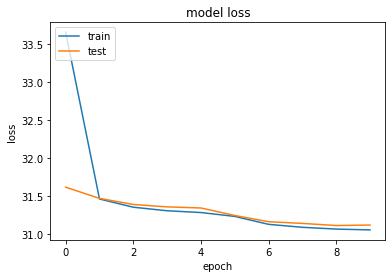

In [42]:
plt_hist(hist)

In [43]:
def plt_reduce(x, color='merchant_category_id'):
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], c=df_dd_benign[color],
            alpha=.4, s=3**2, cmap='viridis')
    #plt.colorbar()
    plt.show()

# Test

In [58]:
# Predict Embedding values

encoder = Model(x, z_mu)
z_df = encoder.predict(df_dd_benign_norm, batch_size = batch_size)

In [59]:
# Reduce dimmension
pca      = PCA(n_components=2)
x_reduce = pca.fit_transform(z_df)

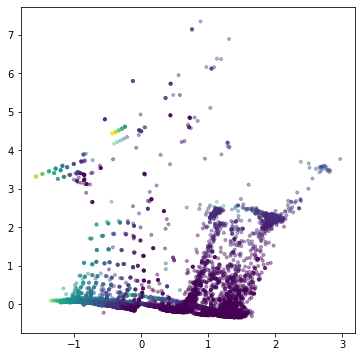

In [60]:
# Plot with MI_dir_L5_weight color
plt_reduce(x_reduce, 'MI_dir_L5_weight')

# Metrics